In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:15<00:00, 79.9MB/s]
100% 1.06G/1.06G [00:15<00:00, 72.7MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras import regularizers
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization, Dropout

**Generate**

In [6]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.


In [7]:
test_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 5000 files belonging to 2 classes.


Normalize (converting size btw 0 and 1)

In [8]:
def process(image,label):
  image = tf.cast(image/255, tf.float32)
  return image,label

  train_ds = train_ds.map(process)
  test_ds = test_ds.map(process)

Creating CNN model

In [9]:
model=Sequential()

model.add(Conv2D(8,kernel_size=(3,3),kernel_regularizer=regularizers.l2(0.01),padding='valid',activation='leaky_relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(16,kernel_size=(3,3),kernel_regularizer=regularizers.l2(0.01),padding='valid',activation='leaky_relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),kernel_regularizer=regularizers.l2(0.01),padding='valid',activation='leaky_relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),kernel_regularizer=regularizers.l2(0.01),padding='valid',activation='leaky_relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),kernel_regularizer=regularizers.l2(0.01),padding='valid',activation='leaky_relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Flatten())

model.add(Dense(128,activation='leaky_relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='leaky_relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 8)         │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 16)        │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,2

 Total params: 697,649 (2.66 MB)

 Trainable params: 697,153 (2.66 MB)

 Non-trainable params: 496 (1.94 KB)

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,
                               restore_best_weights=True)

In [13]:
history=model.fit(train_ds,epochs=10,validation_data=test_ds,callbacks=[early_stopping])

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 57ms/step - accuracy: 0.6401 - loss: 1.8619 - val_accuracy: 0.7140 - val_loss: 0.8954
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 60ms/step - accuracy: 0.7515 - loss: 0.7419 - val_accuracy: 0.7482 - val_loss: 0.6757
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 53ms/step - accuracy: 0.8028 - loss: 0.5904 - val_accuracy: 0.8042 - val_loss: 0.5846
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 55ms/step - accuracy: 0.8365 - loss: 0.5244 - val_accuracy: 0.7802 - val_loss: 0.6294
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 54ms/step - accuracy: 0.8586 - loss: 0.4827 - val_accuracy: 0.6874 - val_loss: 0.7485
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.8770 - loss: 0.4521 - val_accuracy: 0.8580 - val_loss: 0.4807
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 62ms/step - accuracy: 0.8831 - loss: 0.4279 - val_accuracy: 0.8638 - val_loss: 0.4623
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 54ms/step - accuracy: 0.8928 - loss: 0.4076 - 

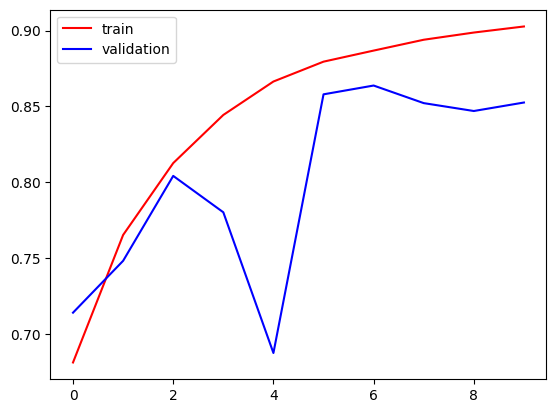

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

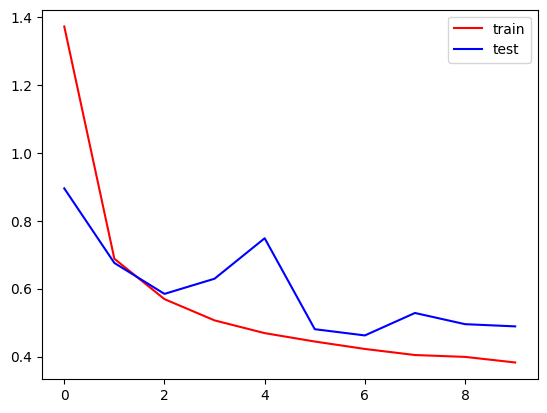

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()

In [18]:
import cv2

In [32]:
test_img=cv2.imread('/content/dog.jpg')
test_img.shape

(430, 710, 3)

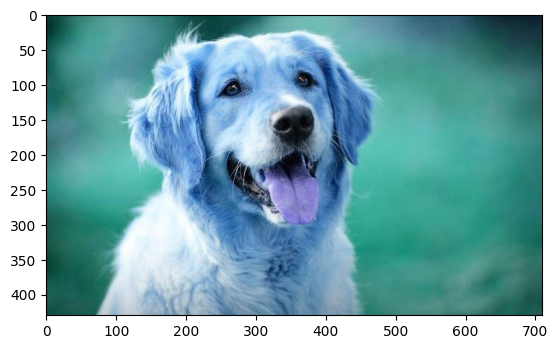

In [33]:
plt.imshow(test_img)

In [34]:
test_img=cv2.resize(test_img,(256,256))

In [35]:
test_input=test_img.reshape((1,256,256,3))

In [36]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0.9998374]], dtype=float32)

In [37]:
predictions = model.predict(test_input)
predicted_class = (predictions >= 0.5).astype(int)
print(predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[1]]


In [26]:
test_img=cv2.imread('/content/cat.jpg')
test_img.shape

(350, 700, 3)

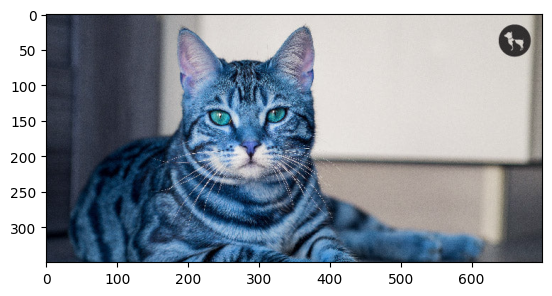

In [27]:
plt.imshow(test_img)

In [28]:
test_img=cv2.resize(test_img,(256,256))

In [29]:
test_input=test_img.reshape((1,256,256,3))

In [30]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[8.279664e-07]], dtype=float32)

In [31]:
predictions = model.predict(test_input)
predicted_class = (predictions >= 0.5).astype(int)
print(predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[0]]
